### Import database

In [2]:
import pandas as pd

df = pd.read_csv('exports.csv')

### General Information

How many rows are there in the table? Are there any empty spaces that should be adressed?

In [14]:
df_rows = df.shape[0]
print('Number of rows in table: {}'.format(df_rows))

empty_cells = df.applymap(lambda x: isinstance(x, str) and x.strip() == "")
bool_empty_cells = empty_cells.any().any()

print('Are there empty spaces that should be adressed?', bool_empty_cells)

Number of rows in table: 142360
Are there empty spaces that should be adressed? False


### How did exports to France evolve over the years?

Create a table with the years 2016, 2017, 2018, 2019 and 2020, and the value of exports in US$

Year
2016    4615500082
2017    4448705456
2018    5239424416
2019    5218723612
2020    3967594810
Name: US$ FOB, dtype: int64

<Axes: xlabel='Year'>

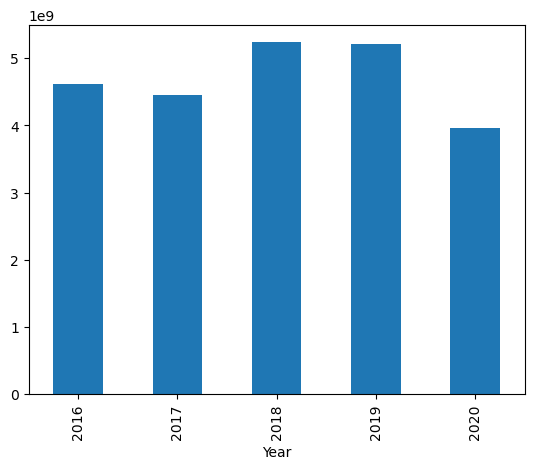

In [32]:
year_exports = df.groupby('Year')['US$ FOB'].sum()
#year_exports = year_exports.map(lambda x: f'B.US$ {x / 1e9:,.1f}')
display(year_exports)
year_exports.plot(kind='bar')

### What are the most exported products throughout the entire period?

Return the products with the highest export value in US$

In [59]:
highest_value_products = df.groupby('SH2 Description')['US$ FOB'].sum().nlargest()
display(highest_value_products)

SH2 Description
Residues and waste from the food industries; others                       5641498484
Ores, slag and ash                                                        3404353274
Nuclear reactors, boilers, machinery and mechanical appliances; others    1889781694
Pulp of wood or of other fibrous cellulosic material, others,             1855424642
Aircraft, spacecraft, and parts thereof                                   1253007710
Name: US$ FOB, dtype: int64

### In 2020, which city exported the most to France?

Return the the city and the value in US$

In [66]:
df_2020 = df.loc[df['Year']==2020, :]
city_most_exports_2020 = df_2020.groupby('City')['US$ FOB'].sum().nlargest(1)
display(city_most_exports_2020)

City
Duque de Caxias - RJ    279405596
Name: US$ FOB, dtype: int64

### What are the most exported products (in US$) that the two largest cities (in terms of export value in 2020) exported?

In [108]:
cities_most_exports_2020 = df_2020.groupby('City')['US$ FOB'].sum().nlargest(2).reset_index()
cities_most_exported_df = df_2020.loc[df_2020['City'].isin(cities_most_exports_2020['City'])]
cities_products_exported = cities_most_exported_df.groupby(['City', 'SH2 Description' ])['US$ FOB'].sum().reset_index()

# Finds the most exported products from the cities that exported the most
cities_most_exported_products = (cities_products_exported.loc[cities_products_exported.groupby('City')['US$ FOB'].idxmax()].sort_values(by='US$ FOB', ascending=False))

display(cities_most_exported_products)

,City,SH2 Description,US$ FOB
21,Luís Eduardo Magalhães - BA,Residues and waste from the food industries; o...,265299808
10,Duque de Caxias - RJ,"Nuclear reactors, boilers, machinery and mecha...",185816982
